In [1]:
import networkx as nx
import copy
import numpy as np
import math

## PageRank implementation

In [2]:
class PageRank():
    def __init__(self,graph,dumping_fator=0.15):
        """
        initialization: input directed graph to calculate its rank value
        """
        self.graph=graph
        self.dump=dumping_fator 
        self.delta=0.00001
        self.max_iter=100
        self.nodes=self.graph.nodes()
        self.web_num=len(self.nodes)
        
    def rank_M(self):
        """
        main calculate function by transfer matrix
        """
        # the probality of randomly click other pages `d/n`
        random=self.dump/self.web_num
        
        if self.web_num==0:
            return {}
        
        # initial PageRank value
        X0=np.ones(self.web_num)/self.web_num
        # transfer matrix
        M=np.zeros((self.web_num,self.web_num))
        for web_i in range(self.web_num):
            web=list(self.nodes)[web_i]
            out_webs=list(self.graph.successors(web))
            if len(list(out_webs))==0:
                continue
            for web_j in range(self.web_num):
                for out_i in range(len(out_webs)):
                    if out_webs[out_i] ==list(self.nodes)[web_j]:
                        M[web_j][web_i]=1/len(out_webs)   
        
        # repeatedly calculating PageRank values
        for i in range(self.max_iter):
            # PageRank
            X1=M.dot(X0)*(1-self.dump)+random
            
            # calculating difference between iteration t and t-1, by distance of value martrix
            diff=abs(np.linalg.norm(X1)-np.linalg.norm(X0))
            # PageRank converging or not by distance
            if diff<self.delta:
                #print('iteration:',i)
                PR={}
                for ind in range(self.web_num):
                    PR[list(self.nodes)[ind]]=X1[ind]
                return PR
            X0=X1.copy()
        
        PR={}
        for ind in range(self.web_num):
            PR[list(self.nodes)[ind]]=X1[ind]
        return PR
        
        
        

### import hw3 data and print out their PageRank values

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
compu_time=[]
nodes=[]

options = {
    'node_color' : 'pink',
    'alpha':0.5,
    'width' : 1,
    'with_labels' : True,
}

path = "hw3dataset/"
file_list = os.listdir(path)
file_list.sort()

for file in file_list:
    t=time.time()
    if file[0]=='.':
        continue
    print('\n========{}========='.format(file))
    edges=[]
    with open(path+file,'r') as f:
        for l in f.readlines():
            edges.append(tuple(l.strip().split(',')))
        G=nx.DiGraph()
        G.add_edges_from(edges)
        nx.draw(G,**options)
        plt.show()
        PR=PageRank(G).rank_M()
        compu_time.append(time.time()-t)
        print('Computation time:',compu_time[-1])
        nodes.append(len(list(G.nodes)))
        PR_=sorted(PR.items(), key=lambda PR:PR[1],reverse=True)
        print('PageRank values:',PR_)
        
        plt.figure(figsize=(20,6))
        sns.barplot()
        sns.barplot(x=list(PR.keys()),y=list(PR.values()))
        plt.xlabel('node')
        plt.ylabel('PageRank')
        if file=='graph_6.txt' or file=='graph_5.txt':
            plt.xticks(fontsize=8,rotation=45)
        else:
            plt.xticks(fontsize=8)
        plt.show()


========GroceryStoreDataSet.txt=========


/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


<Figure size 640x480 with 1 Axes>

Computation time: 0.07538199424743652
PageRank values: [('CORNFLAKES', 0.08733969803781466), ('BISCUIT', 0.04720984903202285), ('BOURNVITA', 0.030177535280236548), ('MILK', 0.02571773588655813), ('COFFEE', 0.025474263930519193), ('BREAD', 0.024809937134870147), ('TEA', 0.021980958883686744), ('COCK', 0.020603113260027117), ('SUGER', 0.020603113260027117), ('MAGGI', 0.016534090909090908), ('JAM', 0.013636363636363636)]


<Figure size 2000x600 with 1 Axes>


========graph_1.txt=========


<Figure size 640x480 with 1 Axes>

Computation time: 0.02379584312438965
PageRank values: [('6', 0.10380841406249998), ('5', 0.09271578124999999), ('4', 0.07966562499999999), ('3', 0.0643125), ('2', 0.04625), ('1', 0.024999999999999998)]


<Figure size 2000x600 with 1 Axes>


========graph_2.txt=========


<Figure size 640x480 with 1 Axes>

Computation time: 0.0245211124420166
PageRank values: [('1', 0.2), ('2', 0.2), ('3', 0.2), ('4', 0.2), ('5', 0.2)]


<Figure size 2000x600 with 1 Axes>


========graph_3.txt=========


<Figure size 640x480 with 1 Axes>

Computation time: 0.05835843086242676
PageRank values: [('2', 0.3245588142155468), ('3', 0.3245588142155468), ('1', 0.175441185784453), ('4', 0.175441185784453)]


<Figure size 2000x600 with 1 Axes>


========graph_4.txt=========


<Figure size 640x480 with 1 Axes>

Computation time: 0.0328061580657959
PageRank values: [('1', 0.28030889358412353), ('5', 0.1841837278570936), ('2', 0.1587532260753979), ('3', 0.13888049892210472), ('4', 0.10822254106635434), ('7', 0.0690712908850486), ('6', 0.06057982160987718)]


<Figure size 2000x600 with 1 Axes>


========graph_5.txt=========


<Figure size 640x480 with 1 Axes>

Computation time: 3.244324207305908
PageRank values: [('61', 0.002864775197610931), ('122', 0.0028196036911690005), ('104', 0.002051337029915936), ('212', 0.0015586197291281184), ('282', 0.0014784000892374355), ('185', 0.0014522677120685319), ('325', 0.001435416721987469), ('348', 0.0013743805563446432), ('148', 0.0012039659106643087), ('96', 0.0011893575953928724), ('44', 0.0009451322161138274), ('134', 0.0009089523318936965), ('94', 0.0008540686853056928), ('24', 0.0008535868439312867), ('40', 0.0008391052686620344), ('287', 0.0008391052686620344), ('43', 0.0007748170168450874), ('21', 0.0007710005091616507), ('204', 0.0007541220276606925), ('22', 0.0007496597682553692), ('454', 0.0007481911870587975), ('327', 0.0007478445643245801), ('277', 0.000739842258890569), ('363', 0.0007378634062545535), ('264', 0.000732187846096364), ('433', 0.0007183781755813585), ('301', 0.0007101486078173274), ('152', 0.0007081272645494184), ('386', 0.0007081012593136756), ('249', 0.0006992816093328762), 

<Figure size 2000x600 with 1 Axes>


========graph_6.txt=========


<Figure size 640x480 with 1 Axes>

Computation time: 57.319273471832275
PageRank values: [('1052', 0.0006945336907925149), ('761', 0.0005599691517202037), ('1151', 0.0005599691517202037), ('62', 0.0005565426361708812), ('394', 0.0005435050088343447), ('78', 0.0005434353240147387), ('863', 0.0005426529490014959), ('1123', 0.0005224875087086691), ('501', 0.00048227769597724397), ('180', 0.000415153541942591), ('1227', 0.00038107300383287434), ('410', 0.00037344615648543804), ('374', 0.0003634192464262903), ('387', 0.0003634192464262903), ('1021', 0.0003634192464262903), ('819', 0.0003626395711958745), ('554', 0.00036155286464372387), ('1084', 0.0003502931983356362), ('43', 0.0003489850451481881), ('415', 0.00034816461528911543), ('528', 0.00034516902086149644), ('468', 0.0003444110466435182), ('946', 0.0003428691594013398), ('506', 0.0003399468486782294), ('225', 0.0003366120128779108), ('273', 0.000333879835339235), ('494', 0.00033352949086007746), ('220', 0.00032787428300169535), ('578', 0.00032664010105118197), ('370',

<Figure size 2000x600 with 1 Axes>

### computation analysis

/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


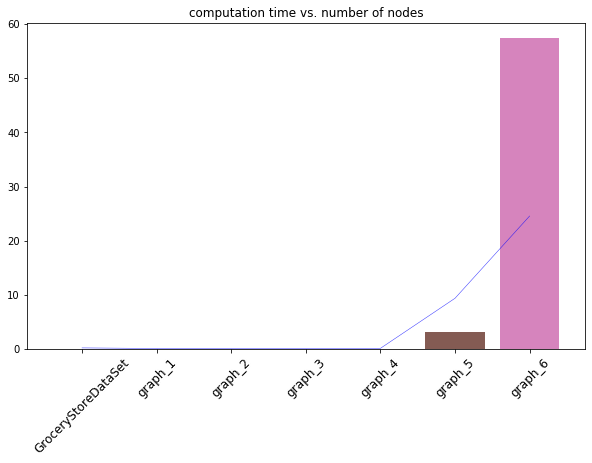

In [4]:
plt.figure(figsize=(10,6))
sns.barplot(np.arange(len(compu_time)),compu_time)
sns.lineplot(np.arange(len(compu_time)),np.array(nodes)*0.02,lw=0.5,c='b',alpha=0.8)
plt.title('computation time vs. number of nodes')
plt.xticks(np.arange(len(compu_time)),('GroceryStoreDataSet','graph_1','graph_2','graph_3','graph_4','graph_5',
                                       'graph_6'),fontsize=12,rotation=45)
plt.show()

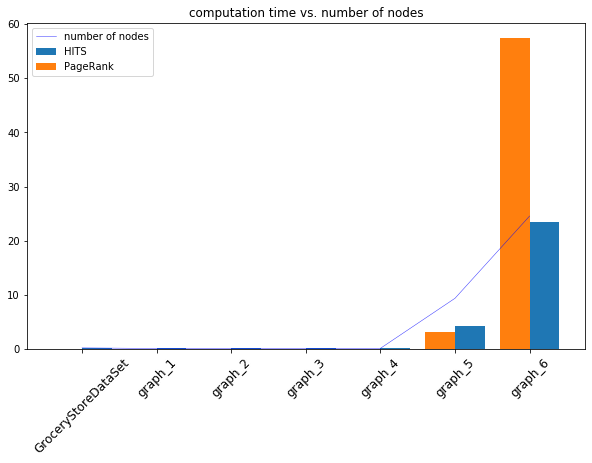

In [5]:
time_hits=[0.23964595794677734, 0.14050769805908203, 0.13724637031555176, 0.1355745792388916, 0.20584750175476074, 4.238632917404175, 23.38247299194336]

plt.figure(figsize=(10,6))
width=4
x=np.arange(len(compu_time))
plt.bar(x,time_hits,label='HITS',width=0.4,align = "edge")
plt.bar(x,compu_time,label='PageRank',width=-0.4,align = "edge")
plt.plot(np.arange(len(compu_time)),np.array(nodes)*0.02,lw=0.5,c='b',alpha=0.8,label='number of nodes')
plt.title('computation time vs. number of nodes')
plt.xticks(np.arange(len(compu_time)),('GroceryStoreDataSet','graph_1','graph_2','graph_3','graph_4','graph_5',
                                       'graph_6'),fontsize=12,rotation=45)
plt.legend()
plt.show()

----------
## Find a way (e.g., add/delete some links) to increase hub, authority, and PageRank of Node 1 in first 3 graphs respectively.

### Increasing PageRank

In [6]:
def plot_node_1(file):
    print('====={}====='.format(file))
    #print('HITS value of \'1\' node:\n')
    edges1_0=[]
    with open("hw3dataset/{}".format(file),'r') as f:
        for l in f.readlines():
            edges1_0.append(tuple(l.strip().split(',')))
        G1_0=nx.DiGraph()
        G1_0.add_edges_from(edges1_0)
        PR=PageRank(G1_0).rank_M()
        #print('original:',PR1_0['1'])
        plt.figure(figsize=(10,7))
        width = 0.4
        x=np.arange(1,len(list(G1_0.nodes))+3)
        plt.subplot(2,1,1)
        plt.bar(x[0], PR['1'], width=width)
        plt.subplot(2,1,2)
        plt.bar(x[0], PR['1'], width=width)

        edges1_2=edges1_0.copy()
        edges1_4=edges1_0.copy()
        for i in range(1,len(list(G1_0.nodes))+1):
            edges1_1=edges1_0.copy()
            edges1_1.append((str(i),'1'))
            edges1_3=edges1_0.copy()
            edges1_3.append(('1',str(i)))
            edges1_2.append((str(i),'1'))
            edges1_4.append(('1',str(i)))
            G1_1=nx.DiGraph()
            G1_1.add_edges_from(edges1_1)
            G1_3=nx.DiGraph()
            G1_3.add_edges_from(edges1_3)
            PR=PageRank(G1_1).rank_M()
            #print('\nadding e({},1):'.format(i))
            #print('authority values:',a['1'])
            #print('hub values:',h['1'])
            plt.subplot(2,1,1)
            plt.bar(x[i], PR['1'], width=width)
            PR=PageRank(G1_3).rank_M()
            plt.subplot(2,1,2)
            plt.bar(x[i], PR['1'], width=width)
           
        G1_2=nx.DiGraph()
        G1_2.add_edges_from(edges1_2)
        PR=PageRank(G1_2).rank_M()
        #print('\nadding edges from all nodes:')
        #print('authority values:',a['1'])
        #print('hub values:',h['1'])
        plt.subplot(2,1,1)
        plt.bar(x[-1], PR['1'], width=width)
        G1_4=nx.DiGraph()
        G1_4.add_edges_from(edges1_4)
        PR=PageRank(G1_4).rank_M()
        plt.subplot(2,1,2)
        plt.bar(x[-1], PR['1'], width=width)
        if file=='graph_1.txt':
            plt.subplot(2,1,1)
            plt.title('adding edges to node \'1\'')
            plt.xticks(np.arange(1,x[-1]+1),('origin','e(1,1)','e(2,1)','e(3,1)','e(4,1)','e(5,1)','e(6,1)','e(all,1)'),
                       fontsize=12)
            plt.subplot(2,1,2)
            plt.title('adding edges from node \'1\'')
            plt.xticks(np.arange(1,x[-1]+1),('origin','e(1,1)','e(1,2)','e(1,3)','e(1,4)','e(1,5)','e(1,6)','e(1,all)'),
                       fontsize=12)
        elif file=='graph_2.txt':
            plt.subplot(2,1,1)
            plt.title('adding edges to node \'1\'')
            plt.xticks(np.arange(1,x[-1]+1),('origin','e(1,1)','e(2,1)','e(3,1)','e(4,1)','e(5,1)','e(all,1)'),
                       fontsize=12)
            plt.subplot(2,1,2)
            plt.title('adding edges from node \'1\'')
            plt.xticks(np.arange(1,x[-1]+1),('origin','e(1,1)','e(1,2)','e(1,3)','e(1,4)','e(1,5)','e(1,all)'),
                       fontsize=12)
        else:
            plt.subplot(2,1,1)
            plt.title('adding edges to node \'1\'')
            plt.xticks(np.arange(1,x[-1]+1),('origin','e(1,1)','e(2,1)','e(3,1)','e(4,1)','e(all,1)'),
                       fontsize=12)
            plt.subplot(2,1,2)
            plt.title('adding edges from node \'1\'')
            plt.xticks(np.arange(1,x[-1]+1),('origin','e(1,1)','e(1,2)','e(1,3)','e(1,4)','e(1,all)'),
                       fontsize=12)
            
        plt.show()

=====graph_1.txt=====


/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the s

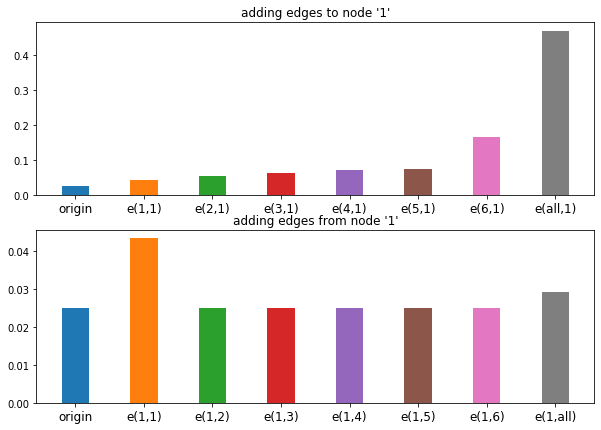

In [7]:
plot_node_1('graph_1.txt')

=====graph_2.txt=====


/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the s

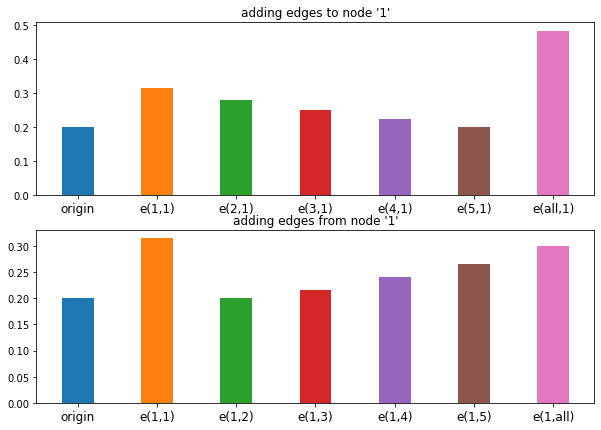

In [8]:
plot_node_1('graph_2.txt')

=====graph_3.txt=====


/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the s

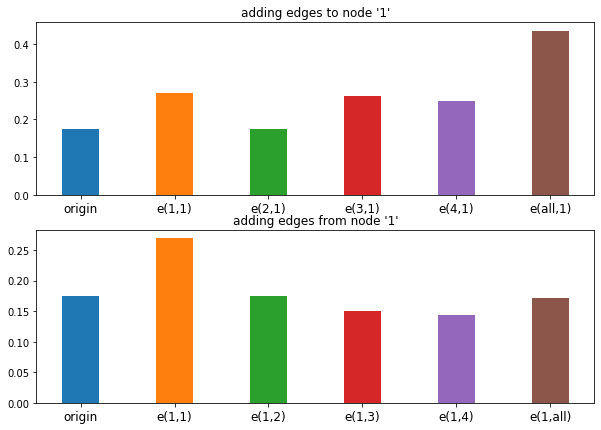

In [9]:
plot_node_1('graph_3.txt')